<a href="https://colab.research.google.com/github/SarathMohanIITD/Accelerated-Computing-with-CUDA-in-C/blob/main/ell784_asgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
l = [f"{x}" for x in range(1,786)]
url='https://raw.githubusercontent.com/SarathMohanIITD/ell784/main/all.csv'
df = pd.read_csv(url,names=l)

In [3]:
X = df.drop('785',axis=1)
X[1:2]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

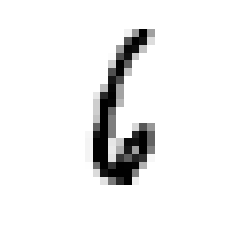

In [4]:
some_digit = np.array(X[2003:2004])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.savefig('6.png', bbox_inches='tight')
plt.show()

## Building the model

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('785',axis=1)
y = df['785']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [7]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[784]),
keras.layers.Dropout(rate=0.04),
keras.layers.Dense(500, activation="relu"),
keras.layers.Dropout(rate=0.24),
keras.layers.Dense(400, activation="relu"),
keras.layers.Dropout(rate=0.12),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dropout(rate=0.09),
keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               4

In [9]:
epochs=10
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              metrics='accuracy')

In [10]:
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,
                                           test_size=0.1)

In [11]:
history = model.fit(X_trainn, y_trainn, epochs=500,
                    validation_data=(X_val, y_val),batch_size=32)

Epoch 1/500
76/76 [==============================] - 3s 9ms/step - loss: 29.5662 - accuracy: 0.3753 - val_loss: 3.9322 - val_accuracy: 0.6889
Epoch 2/500
76/76 [==============================] - 0s 6ms/step - loss: 7.5508 - accuracy: 0.5658 - val_loss: 2.1324 - val_accuracy: 0.7259
Epoch 3/500
76/76 [==============================] - 1s 7ms/step - loss: 4.8070 - accuracy: 0.6012 - val_loss: 1.3973 - val_accuracy: 0.7222
Epoch 4/500
76/76 [==============================] - 1s 7ms/step - loss: 3.2562 - accuracy: 0.6247 - val_loss: 1.1698 - val_accuracy: 0.7074
Epoch 5/500
76/76 [==============================] - 0s 6ms/step - loss: 2.6148 - accuracy: 0.6091 - val_loss: 0.9199 - val_accuracy: 0.6889
Epoch 6/500
76/76 [==============================] - 1s 7ms/step - loss: 2.0239 - accuracy: 0.6107 - val_loss: 0.9376 - val_accuracy: 0.7185
Epoch 7/500
76/76 [==============================] - 1s 8ms/step - loss: 1.8385 - accuracy: 0.6218 - val_loss: 0.9539 - val_accuracy: 0.7185
Epoch 8/500


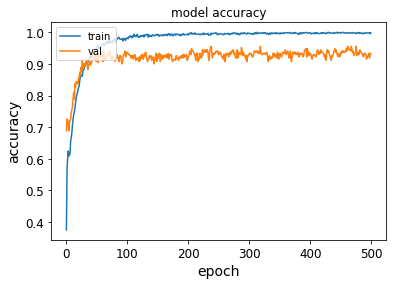

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

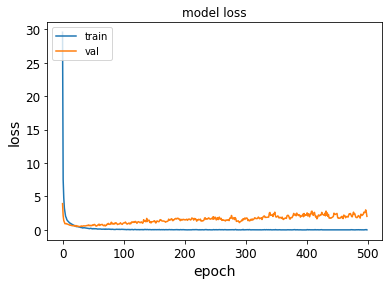

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 1.2  Evaluating missclassified data 

In [14]:
indexx=[]
for i in range(300):
    y_hat=model.predict(x=X_test[i:(1+i)])
    indexx.append(list(y_hat[0]).index(y_hat[0][y_hat[0]==max(y_hat[0])][0]))

1/1 [==============================] - 0s 18ms/step


In [15]:
misc=[]
for i in range(300):
    if indexx[i] != int(y_test[i:(i+1)]):
        misc.append(i)

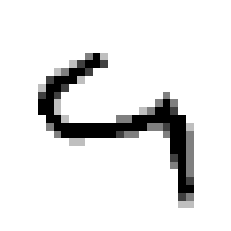

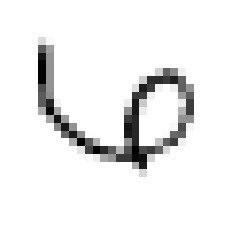

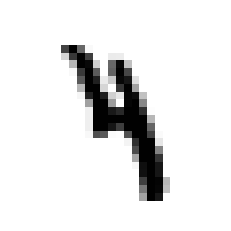

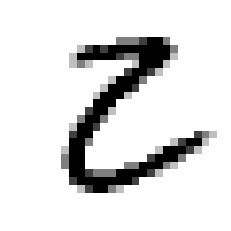

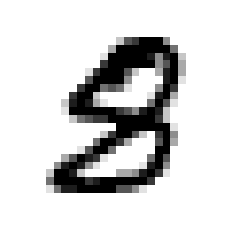

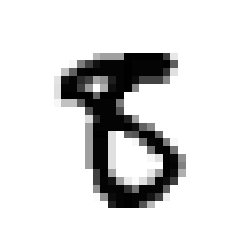

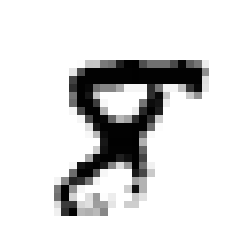

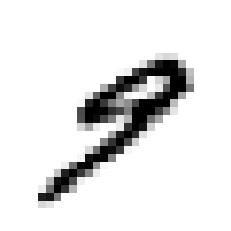

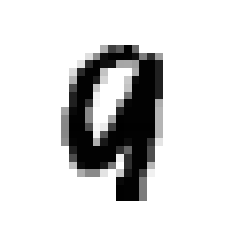

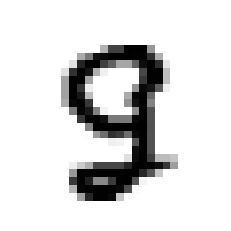

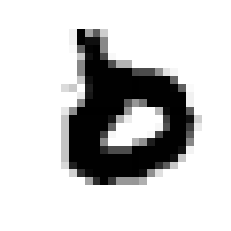

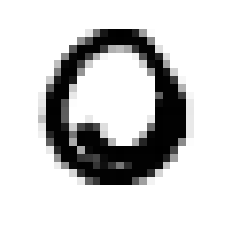

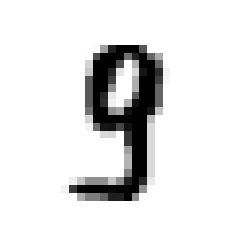

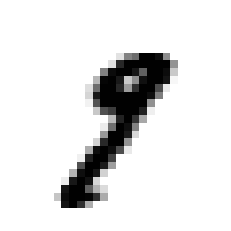

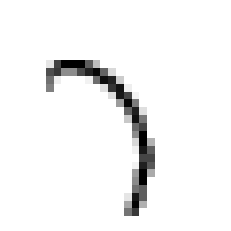

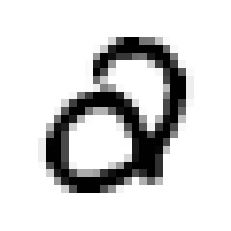

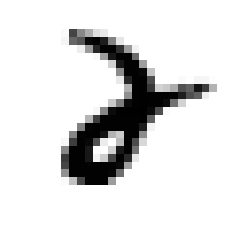

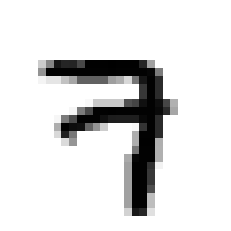

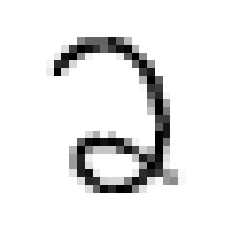

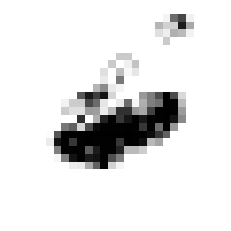

In [16]:
for i in misc:
    some_digit = np.array(X_test[i:(i+1)])
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()

# Building Model with PCA

In [17]:
 url = 'https://raw.githubusercontent.com/SarathMohanIITD/ell784/main/feat_25.csv'
 l = [f'{x}' for x in range(26)]
 dfp = pd.read_csv(url,names=l)

In [19]:
dfp.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2.144960,-0.515543,2.456307,-0.313175,-0.196250,-0.400435,-0.002235,0.758962,-1.521893,0.876946,...,1.478288,-0.506284,-0.977222,1.627727,0.750137,0.947254,-1.256157,1.515236,-0.749157,0.0
1,1.069606,-1.322797,-1.574597,0.131718,2.141695,0.956513,-0.128994,0.170172,-0.876535,0.455700,...,-1.328943,0.608192,-0.543999,0.198569,-0.448332,-1.676062,0.884149,1.132071,1.080965,0.0
2,2.923950,-0.299015,0.097493,-0.147502,1.507630,-0.171050,-0.424214,-1.186337,-1.032455,-0.293790,...,1.766569,-1.195870,0.788330,-1.263583,0.677402,0.271205,0.637562,-0.786596,0.184896,0.0
3,0.508371,-0.595483,1.852405,-0.129178,0.369940,-0.348694,-1.352782,2.033914,0.829703,1.001199,...,-0.599648,-1.077986,-0.478403,2.493509,1.675510,0.482612,-1.635286,0.205782,-1.044682,0.0
4,0.927613,0.631437,-0.841571,-0.464269,-0.691622,-0.910490,0.569596,-0.349991,-0.249196,0.501382,...,1.077910,-1.386733,-0.380926,-0.825129,0.196509,0.008183,-0.655576,-0.023155,-0.451418,0.0


In [21]:
X = dfp.drop('25',axis=1)
y = dfp['25']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [22]:
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,
                                           test_size=0.1)

In [23]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[25]),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(200, activation="relu"),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(150, activation="relu"),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dropout(rate=0.01),
keras.layers.Dense(80, activation="relu"),
keras.layers.Dropout(rate=0.01),
keras.layers.Dense(10, activation="softmax")
])


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25)                0         
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_4 (Dense)             (None, 200)               5200      
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 150)               30150     
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.000157),
              metrics='accuracy')

In [26]:
history = model.fit(X_trainn, y_trainn, epochs=150,
                    validation_data=(X_val, y_val))

Epoch 1/150
76/76 [==============================] - 1s 6ms/step - loss: 2.2112 - accuracy: 0.2177 - val_loss: 2.0816 - val_accuracy: 0.4222
Epoch 2/150
76/76 [==============================] - 0s 4ms/step - loss: 1.9046 - accuracy: 0.4992 - val_loss: 1.6319 - val_accuracy: 0.6852
Epoch 3/150
76/76 [==============================] - 0s 3ms/step - loss: 1.3835 - accuracy: 0.6679 - val_loss: 1.0318 - val_accuracy: 0.7667
Epoch 4/150
76/76 [==============================] - 0s 4ms/step - loss: 0.9389 - accuracy: 0.7477 - val_loss: 0.7088 - val_accuracy: 0.8259
Epoch 5/150
76/76 [==============================] - 0s 4ms/step - loss: 0.7536 - accuracy: 0.7782 - val_loss: 0.5747 - val_accuracy: 0.8481
Epoch 6/150
76/76 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.8086 - val_loss: 0.5230 - val_accuracy: 0.8630
Epoch 7/150
76/76 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.8189 - val_loss: 0.4786 - val_accuracy: 0.8667
Epoch 8/150
7

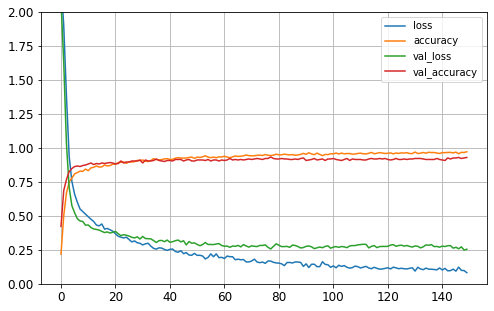

In [27]:
#pd.DataFrame(history.history).plot(figsize=(8, 5))
#plt.grid(True)
#plt.gca().set_ylim(0,2) # set the vertical range to [0-1]
#plt.show()

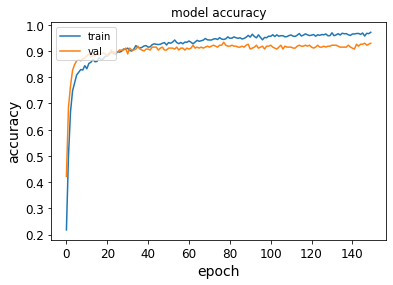

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

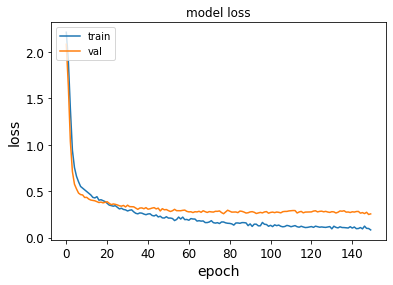

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.9600


[0.14418822526931763, 0.9599999785423279]

## Miscalssified observations of PCA data

In [29]:
indexx=[]
for i in range(300):
    y_hat=model.predict(x=X_test[i:(1+i)])
    indexx.append(list(y_hat[0]).index(y_hat[0][y_hat[0]==max(y_hat[0])][0]))

1/1 [==============================] - 0s 17ms/step


In [30]:
misc=[]
for i in range(300):
    if indexx[i] != int(y_test[i:(i+1)]):
        misc.append(i)

for i in misc:
    print(int(y_test[i:(i+1)]))

8
6
2
4
3
5
8
9
9
1
0
8


# 1.2 CNN

In [34]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [35]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [36]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [48]:
model = keras.models.Sequential([
keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)        

In [50]:
X = X.reshape((70000,28,28,1))

In [51]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              metrics='accuracy')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [53]:
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train, y_train,
                                           test_size=0.1)

In [54]:
history = model.fit(X_trainn, y_trainn, epochs=30,
                    validation_data=(X_val, y_val), batch_size=1000)

Epoch 1/30
57/57 [==============================] - 7s 109ms/step - loss: 4.8335 - accuracy: 0.1083 - val_loss: 2.3024 - val_accuracy: 0.1062
Epoch 2/30
57/57 [==============================] - 6s 105ms/step - loss: 2.3013 - accuracy: 0.1134 - val_loss: 2.3026 - val_accuracy: 0.1062
Epoch 3/30
57/57 [==============================] - 6s 106ms/step - loss: 2.3010 - accuracy: 0.1134 - val_loss: 2.3029 - val_accuracy: 0.1062
Epoch 4/30
57/57 [==============================] - 6s 106ms/step - loss: 2.3010 - accuracy: 0.1134 - val_loss: 2.3030 - val_accuracy: 0.1062
Epoch 5/30
57/57 [==============================] - 6s 106ms/step - loss: 2.3010 - accuracy: 0.1134 - val_loss: 2.3032 - val_accuracy: 0.1062
Epoch 6/30
57/57 [==============================] - 6s 106ms/step - loss: 2.3010 - accuracy: 0.1134 - val_loss: 2.3031 - val_accuracy: 0.1062
Epoch 7/30
57/57 [==============================] - 6s 106ms/step - loss: 2.3010 - accuracy: 0.1134 - val_loss: 2.3030 - val_accuracy: 0.1062
Epoch 

In [55]:
model.evaluate(X_test, y_test)

219/219 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1111


[2.3010737895965576, 0.11114285886287689]

In [56]:
#pd.DataFrame(history.history).plot(figsize=(8, 5))
#plt.grid(True)
#plt.gca().set_ylim(0,2) # set the vertical range to [0-1]
#plt.show()

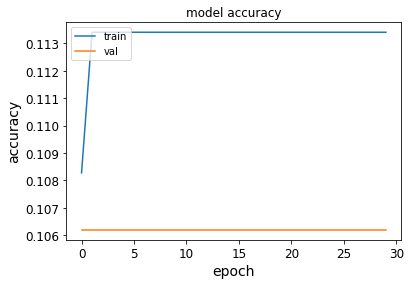

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

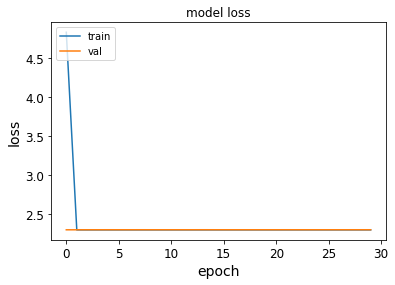

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()